<a href="https://colab.research.google.com/github/claudio-iturra/maps/blob/main/s.maricunga.var.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install netCDF4

In [19]:
import xarray as xr
ds1 = xr.open_dataset('/content/data_stream-oper_stepType-accum.nc')
ds2 = xr.open_dataset('/content/data_stream-oper_stepType-instant.nc')


In [20]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [84]:
ds1

<xarray.Dataset> Size: 3MB
Dimensions:     (valid_time: 8784, latitude: 9, longitude: 9)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 70kB 2024-01-01 ... 2024-12-31T23...
  * latitude    (latitude) float64 72B -26.0 -26.25 -26.5 ... -27.5 -27.75 -28.0
  * longitude   (longitude) float64 72B -70.0 -69.75 -69.5 ... -68.25 -68.0
    number      int64 8B ...
    expver      (valid_time) <U4 141kB ...
Data variables:
    ssr         (valid_time, latitude, longitude) float32 3MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-11-01T17:19 GRIB to CDM+CF via cfgrib-0.9.1...

In [21]:
ds2

<xarray.Dataset> Size: 3MB
Dimensions:     (valid_time: 8784, latitude: 9, longitude: 9)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 70kB 2024-01-01 ... 2024-12-31T23...
  * latitude    (latitude) float64 72B -26.0 -26.25 -26.5 ... -27.5 -27.75 -28.0
  * longitude   (longitude) float64 72B -70.0 -69.75 -69.5 ... -68.25 -68.0
    number      int64 8B ...
    expver      (valid_time) <U4 141kB ...
Data variables:
    sp          (valid_time, latitude, longitude) float32 3MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-11-01T17:19 GRIB to CDM+CF via cfgrib-0.9.1...

In [22]:
lon,lat = np.meshgrid(ds1['longitude'],ds1['latitude'])

(np.float64(-70.1), np.float64(-67.9), np.float64(-28.1), np.float64(-25.9))

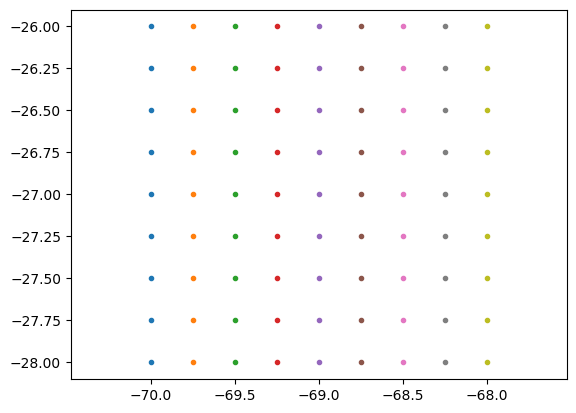

In [25]:
plt.plot(lon,lat,'.');
plt.axis('equal')

In [26]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 87.6 MB/s eta 0:00:00


Text(0.5, 1.0, 'Salar Maricunga')

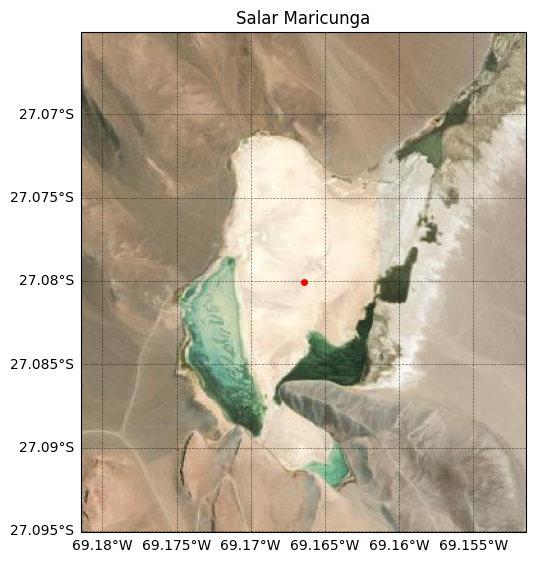

In [105]:
# (Colab) install deps only if needed
# !apt-get -qq install libproj-dev proj-data proj-bin libgeos-dev libgeos++-dev > /dev/null
# !pip install --quiet cartopy shapely pyproj

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature
import numpy as np

# ---------------------------------------
# Esri satellite tiles
class EsriWorldImagery(cimgt.GoogleTiles):
    def _image_url(self, tile):
        x, y, z = tile
        return (
            "https://services.arcgisonline.com/ArcGIS/rest/services/"
            f"World_Imagery/MapServer/tile/{z}/{y}/{x}"
        )

# center
lat_c = -27.080062
lon_c = -69.166442

# very zoomed extent (left panel in your original code)
extent_small = [
    lon_c - 0.015, lon_c + 0.015,
    lat_c - 0.015, lat_c + 0.015,
]

tiler = EsriWorldImagery()
crs_tiles = tiler.crs

# ---------------------------------------
# only ONE figure / ONE axis
fig = plt.figure(figsize=(5, 5), dpi=100)
ax = plt.axes(projection=crs_tiles)

# remove margins
fig.subplots_adjust(left=0.0, right=1.0, bottom=0.0, top=1.0)

# set zoomed extent
ax.set_extent(extent_small, crs=ccrs.PlateCarree())

# imagery
ax.add_image(tiler, 14)  # 14 = fine detail, lower if slow

# mark point
ax.plot(lon_c, lat_c, "o", color="red", markersize=4,
        transform=ccrs.PlateCarree())

ax.plot(lon.flatten(), lat.flatten(), "o", color="pink", markersize=4,
        transform=ccrs.PlateCarree())

# gridlines with labels
gl = ax.gridlines(
    crs=ccrs.PlateCarree(), draw_labels=True,
    linewidth=0.5, color="black", alpha=0.5, linestyle="--",
)
gl.xformatter = cticker.LongitudeFormatter()
gl.yformatter = cticker.LatitudeFormatter()
gl.top_labels = False
gl.right_labels = False

ax.set_extent(extent_small, crs=ccrs.PlateCarree())
ax.add_image(tiler, 14)
plt.title('Salar Maricunga')



In [100]:
from scipy.signal import savgol_filter

Text(0.5, 1.0, 'Surface net short-wave (solar) radiation')

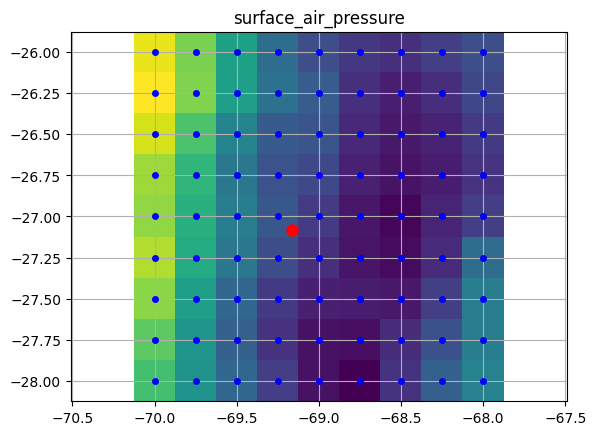

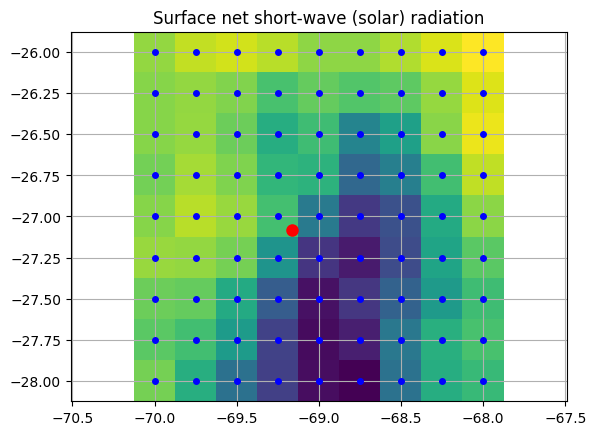

In [87]:
#average during the year 2024
plt.figure()
plt.pcolor(lon,lat, np.nanmean(ds2['sp'], axis = 0))
plt.plot(lon, lat, "o", color="blue", markersize=4);
plt.plot(lon_c, lat_c, "o", color="red", markersize=8);
plt.axis('equal')
plt.grid()
plt.title('surface_air_pressure')


plt.figure()
plt.pcolor(lon,lat, np.nanmean(ds1['ssr'], axis = 0))
plt.plot(lon, lat, "o", color="blue", markersize=4);
plt.plot(lon_c, lat_c, "o", color="red", markersize=8);
plt.axis('equal')
plt.grid()
plt.title('Surface net short-wave (solar) radiation')

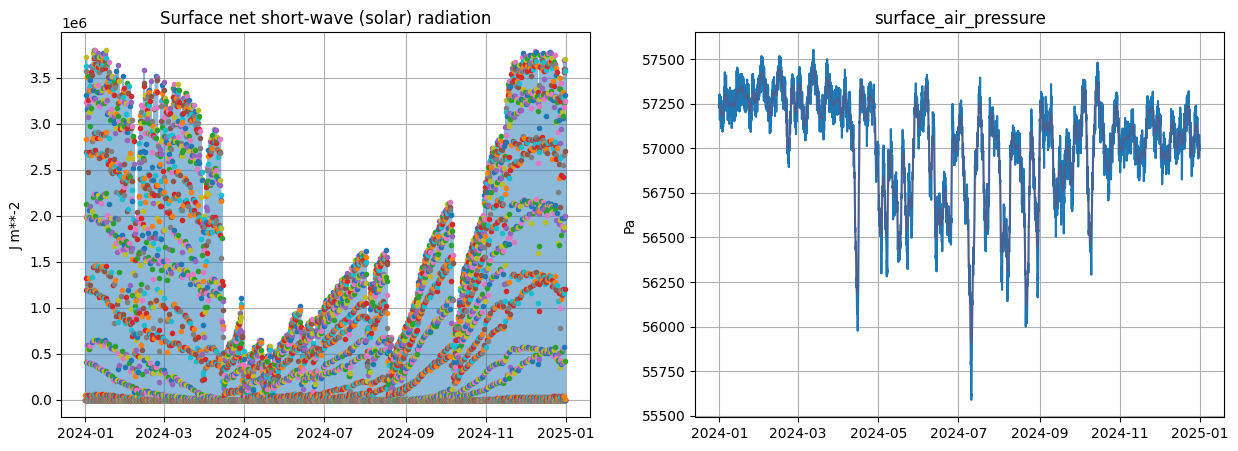

In [124]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(ds1['valid_time'],ds1['ssr'][:,4,5], alpha = 0.5)
for i in range(0,8780):
  plt.plot(ds1['valid_time'][i],ds1['ssr'][i,4,5],marker = '.')

plt.title('Surface net short-wave (solar) radiation')
plt.ylabel('J m**-2')
plt.grid()
plt.subplot(1,2,2)
plt.plot(ds2['valid_time'],ds2['sp'][:,4,5])
plt.plot(ds2['valid_time'],savgol_filter(ds2['sp'][:,4,5],24*5,2),color = 'red', alpha = 0.2)
plt.title('surface_air_pressure')
plt.ylabel('Pa')
plt.grid()